In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

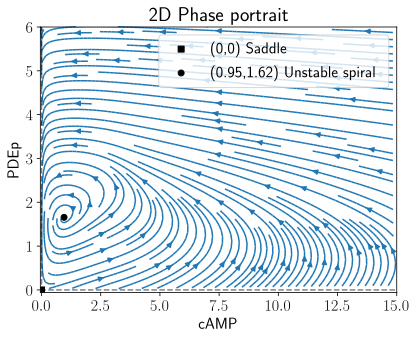

In [2]:
# credit goes to http://www.facweb.iitkgp.ac.in/~adityab/files/lec18.html

# interesting bifurcation values at k1 = 4.5 -> stable spiral at 0.8 stable node
k = 1 # scaling of time
k1, k3, k2 = 9.18/k, 0.12/k, 10/k
r1, r2, r3, r4 = 2.04/k, 9.34/k, 0.56/k, 1.84/k
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt =  1.26, 10
PDEt, Et = 9.66, 2.04

def G(u, v, J, K):
    numerator = 2 * u * K
    den_1 = v - u + v * J + u * K
    den_2 = -4 * (v - u) * u * K
    radicand = den_1**2 + den_2
    denominator = den_1 + np.sqrt(radicand)
    return numerator / denominator

def dPDEp(cAMP, PDEp):
    return r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)

def dcAMP(cAMP, PDEp, ACp):
    return (k1 * ACp) - (k3 + k2 * PDEp) * cAMP

cAMP_range = np.linspace(0, 15, 1500)
PDEp_range = np.linspace(0, 15, 1500)

CAMP, PDEP = np.meshgrid(cAMP_range, PDEp_range)

ACp = ACt * G(r1 * CAMP, r2 * Dt, Km1 / ACt, Km2 / ACt)

U = dcAMP(CAMP, PDEP, ACp)
V = dPDEp(CAMP, PDEP)
plt.streamplot(CAMP, PDEP, U, V, integration_direction='forward', density=3.1)

plt.scatter(0, 0, color='black', marker='s', label='(0,0) Saddle', alpha=1, zorder=10)
plt.scatter(0.951867, 1.65682, color='black', marker='o', label='(0.95,1.62) Unstable spiral', zorder=10)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('2D Phase portrait')
plt.legend( loc='upper right', bbox_to_anchor=(1, 1.0))
plt.xlim(-0.05, 15)
plt.ylim(-0.06, 6)
plt.xlabel('cAMP')
plt.ylabel('PDEp')
plt.savefig('2D_phase_portrait.png', dpi=300, bbox_inches='tight')
plt.show()